<a href="https://colab.research.google.com/github/RodRBF/An-lises-Financeiras-com-Python/blob/main/Batendo_IBOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Simulando carteiras que batam o IBOVA11**

---
**O objetivo** do código abaixo é selecionando ações da bolsa brasileira, de forma randomica, para construir portfólios de ações e testa-los ao longo do tempo para comprar com os rendimentos do IBOVA11

A conclusão, ao análisar o gráfico de plotagem dos portfólios é que, aparentemente "bater" os retorno do IBOVA11 não seria algo tão complexo. Ainda faltam testes estatísticos, porém, o gráfico ja nos retorna uma boa compreensão sobre o tema.


In [ ]:

!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl, plt
import seaborn as sns
sns.set()
import random

In [ ]:
tickers_ibov = "ABEV3.SA AZUL4.SA B3SA3.SA BBAS3.SA BBDC3.SA BBDC4.SA BBSE3.SA BPAC11.SA BRAP4.SA BRDT3.SA BRFS3.SA BRKM5.SA BRML3.SA BTOW3.SA CCRO3.SA CIEL3.SA CMIG4.SA COGN3.SA CRFB3.SA CSAN3.SA CSNA3.SA CVCB3.SA CYRE3.SA ECOR3.SA EGIE3.SA ELET3.SA ELET6.SA EMBR3.SA ENBR3.SA EQTL3.SA FLRY3.SA GGBR4.SA GNDI3.SA GOAU4.SA GOLL4.SA HAPV3.SA HGTX3.SA HYPE3.SA IGTA3.SA IRBR3.SA ITSA4.SA ITUB4.SA JBSS3.SA KLBN11.SA LAME4.SA LREN3.SA MGLU3.SA MRFG3.SA MRVE3.SA MULT3.SA NTCO3.SA PCAR4.SA PETR3.SA PETR4.SA QUAL3.SA RADL3.SA RAIL3.SA RENT3.SA SANB11.SA SBSP3.SA SMLS3.SA SULA11.SA SUZB3.SA TAEE11.SA TIMP3.SA TOTS3.SA UGPA3.SA USIM5.SA VALE3.SA VIVT4.SA VVAR3.SA WEGE3.SA YDUQ3.SA"

dados_yahoo = yf.download(tickers=tickers_ibov, period='1y')['Adj Close']

ibov = yf.download('BOVA11.SA', period='1y')['Adj Close']
ibov = ibov/ibov.iloc[0]

[*********************100%%**********************]  73 of 73 completed
ERROR:yfinance:
14 Failed downloads:
ERROR:yfinance:['BRML3.SA', 'BRDT3.SA', 'VVAR3.SA', 'PCAR4.SA', 'SULA11.SA', 'TIMP3.SA', 'VIVT4.SA', 'BTOW3.SA', 'LAME4.SA', 'ENBR3.SA', 'SMLS3.SA', 'HGTX3.SA', 'GNDI3.SA', 'IGTA3.SA']: Exception('%ticker%: No data found, symbol may be delisted')
[*********************100%%**********************]  1 of 1 completed


In [ ]:
ibov

Date
2023-02-28    1.000000
2023-03-01    1.000494
2023-03-02    0.988038
2023-03-03    0.992783
2023-03-06    1.003164
                ...   
2024-02-23    1.241819
2024-02-26    1.243401
2024-02-27    1.263865
2024-02-28    1.248245
2024-02-29    1.238062
Name: Adj Close, Length: 250, dtype: float64

In [ ]:
dados_yahoo.dropna(how='all', inplace=True)
dados_yahoo.dropna(axis=1, inplace=True, thresh=250)
dados_yahoo

Ticker,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-28,12.724873,7.13,10.192039,37.794968,10.991264,12.364992,30.233429,19.644033,24.527979,6.16,...,26.794455,50.318546,46.649067,33.443909,26.908747,13.002659,6.514624,80.244972,38.433910,6.963664
2023-03-01,12.800900,6.89,10.143737,36.575779,10.972379,12.270459,30.056677,18.999004,25.565496,6.49,...,26.218534,50.639420,45.701233,33.575577,26.770700,12.815215,6.838924,83.894180,38.649830,6.756236
2023-03-02,12.477788,6.79,10.230684,35.103367,10.799558,12.108548,30.551580,18.940365,25.334938,6.74,...,25.774792,50.435226,45.632832,33.537956,27.086231,12.716561,6.772157,83.706078,38.433910,6.608072
2023-03-03,12.458781,7.24,10.163059,35.497253,10.761730,12.174817,30.109703,18.881725,25.645306,6.72,...,25.378258,49.997673,47.098553,33.575577,27.322876,12.825081,6.848463,83.988243,38.119839,6.588317
2023-03-06,12.829409,9.99,10.588128,36.303810,11.083259,12.581906,30.825552,19.331291,25.290598,7.19,...,25.491552,50.114353,46.688148,33.791885,27.500362,13.209833,6.791233,81.025604,38.698898,6.647583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,12.890000,11.74,12.384674,57.380001,12.450000,13.820000,33.049999,36.950001,21.770000,13.50,...,28.510000,80.190002,55.270000,35.200001,31.530001,30.510000,10.700000,67.379997,35.682056,19.559999
2024-02-26,13.040000,11.73,12.414516,57.930000,12.410000,13.800000,33.070000,36.950001,21.330000,14.01,...,28.389999,80.260002,56.119999,35.060001,31.520000,30.870001,10.670000,65.750000,36.570000,19.670000
2024-02-27,13.310000,12.57,12.683100,58.630001,12.520000,14.020000,33.209999,36.560001,21.639999,15.15,...,28.980000,79.639999,56.820000,35.349998,31.260000,30.850000,10.840000,67.480003,36.959999,20.670000


In [ ]:
retorno = dados_yahoo.pct_change()
retorno_acumulado = (1+retorno).cumprod()
retorno_acumulado.iloc[0] = 1
retorno_acumulado

Ticker,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BPAC11.SA,BRAP4.SA,BRFS3.SA,...,SANB11.SA,SBSP3.SA,SUZB3.SA,TAEE11.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2023-03-01,1.005975,0.966339,0.995261,0.967742,0.998282,0.992355,0.994154,0.967164,1.042299,1.053571,...,0.978506,1.006377,0.979682,1.003937,0.994870,0.985584,1.049780,1.045476,1.005618,0.970213
2023-03-02,0.980583,0.952314,1.003792,0.928784,0.982558,0.979260,1.010523,0.964179,1.032900,1.094156,...,0.961945,1.002319,0.978215,1.002812,1.006596,0.977997,1.039532,1.043132,1.000000,0.948936
2023-03-03,0.979089,1.015428,0.997157,0.939206,0.979117,0.984620,0.995908,0.961194,1.045553,1.090909,...,0.947146,0.993623,1.009635,1.003937,1.015390,0.986343,1.051245,1.046648,0.991828,0.946099
2023-03-06,1.008215,1.401122,1.038863,0.960546,1.008370,1.017543,1.019585,0.984080,1.031092,1.167208,...,0.951374,0.995942,1.000838,1.010405,1.021986,1.015933,1.042460,1.009728,1.006895,0.954610
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-23,1.012977,1.646564,1.215132,1.518192,1.132718,1.117672,1.093161,1.880978,0.887558,2.191558,...,1.064026,1.593647,1.184804,1.052509,1.171738,2.346443,1.642459,0.839679,0.928400,2.808866
2024-02-26,1.024765,1.645161,1.218060,1.532744,1.129078,1.116054,1.093822,1.880978,0.869619,2.274351,...,1.059548,1.595038,1.203025,1.048322,1.171366,2.374130,1.637854,0.819366,0.951503,2.824663
2024-02-27,1.045983,1.762973,1.244412,1.551265,1.139086,1.133846,1.098453,1.861125,0.882258,2.459416,...,1.081567,1.582717,1.218031,1.056994,1.161704,2.372592,1.663949,0.840925,0.961651,2.968265


In [ ]:
disp_carteira = 10000 #Valor dispendido para investimento em cada ação da carteira
N_tickers = 6 #número de ações que irão compor minha carteira
carteira = random.sample(list(dados_yahoo.columns), k=N_tickers) #Irá escolher de formas aleatória 6 ações para compor uma carteira
carteira = disp_carteira * retorno_acumulado.loc[: , carteira]
carteira['Saldo'] = carteira.sum(axis=1)
carteira['Retorno'] = carteira['Saldo'].pct_change()
carteira['Retorno'].iloc[0] = 1
carteira

Ticker,SBSP3.SA,IRBR3.SA,SANB11.SA,CIEL3.SA,BRAP4.SA,ELET6.SA,Saldo,Retorno
Date,,,,,,,,
2023-02-28,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,60000.000000,1.000000
2023-03-01,10063.768388,10026.483658,9785.059963,9895.833212,10422.993493,9791.493503,59985.632219,-0.000239
2023-03-02,10023.188298,9772.246601,9619.450042,9958.332861,10328.995371,9730.331127,59432.544300,-0.009220
2023-03-03,9936.231612,9777.542323,9471.458984,10270.832166,10455.531514,9669.168751,59580.765349,0.002494
2023-03-06,9959.419910,9915.254314,9513.741839,10374.998954,10310.918002,9669.168751,59743.501769,0.002731
...,...,...,...,...,...,...,...,...
2024-02-23,15936.470416,21869.704847,10640.261458,11886.484220,8875.578599,13732.374876,82940.874416,-0.003829
2024-02-26,15950.381727,21027.543712,10595.475758,12064.225874,8696.191404,13772.874645,82106.693120,-0.010058
2024-02-27,15827.166175,21880.298310,10815.670631,11997.573284,8822.577466,14073.731651,83417.017517,0.015959


<Axes: xlabel='Date'>

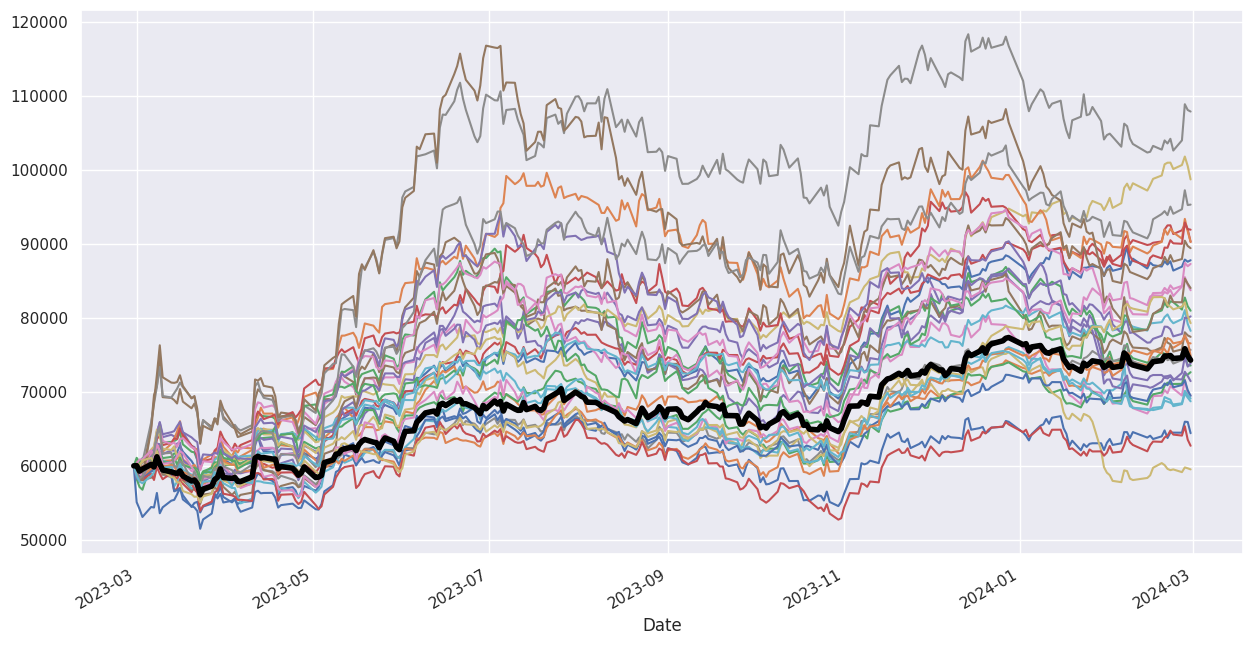

In [ ]:
#Definindo loop para gerar várias carteiras e compara-las com o benchmark
df1=[]
df2=[]
df3=[]
disp_carteira = 10000
N_tickers = 6 #número de ações que irão compor minha carteira
for i in range(30):
  carteira = random.sample(list(dados_yahoo.columns), k=N_tickers) #Irá escolher de formas aleatória N ações para compor uma carteira
  carteira = disp_carteira * retorno_acumulado.loc[: , carteira]
  carteira['Saldo'] = carteira.sum(axis=1)
  saldo = carteira['Saldo']
  df1.append(carteira.columns.tolist()) #acessando nome das colunas
  df2.append(saldo.max())
  saldo.plot(figsize=(15,8))

linha_ibov = (ibov*(N_tickers*disp_carteira))
linha_ibov.plot(linewidth=4, color='black')

In [ ]:
linha_ibov.max()

77344.5362863125

In [ ]:
print('Maior saldo IBOV: {:,.2f}'.format(linha_ibov.max()))

top = 10 #Mostrar as 10 melhores composições de carteira sorteada na data de hoje

pd.set_option('display.max_colwidth', None)  # Isso define a largura máxima de coluna para o tamanho máximo possível
pd.options.display.width = 1000  # Define a largura de exibição

dado_top = {'Composição da Carteira':df1,'Saldo':df2}
cal_data = pd.DataFrame(dado_top)
cal_data = cal_data.sort_values(by= ['Saldo'], ascending=False)
cal_data['Saldo'] = cal_data['Saldo'].apply(lambda x: '{:,.2f}'.format(x))
cal_data.head(top)



Maior saldo IBOV: 77,344.54


,Composição da Carteira,Saldo
17,"[BRFS3.SA, SUZB3.SA, AZUL4.SA, YDUQ3.SA, RADL3.SA, B3SA3.SA, Saldo]","118,329.34"
25,"[USIM5.SA, BBDC3.SA, GOLL4.SA, AZUL4.SA, QUAL3.SA, YDUQ3.SA, Saldo]","116,786.06"
27,"[CVCB3.SA, YDUQ3.SA, EQTL3.SA, FLRY3.SA, BRKM5.SA, PETR3.SA, Saldo]","103,305.74"
8,"[CYRE3.SA, PETR3.SA, ITUB4.SA, CMIG4.SA, UGPA3.SA, ITSA4.SA, Saldo]","101,800.85"
11,"[CYRE3.SA, MRVE3.SA, IRBR3.SA, ITSA4.SA, ABEV3.SA, SBSP3.SA, Saldo]","101,246.50"
13,"[USIM5.SA, CYRE3.SA, RADL3.SA, IRBR3.SA, MRFG3.SA, ABEV3.SA, Saldo]","97,008.68"
16,"[HYPE3.SA, SANB11.SA, USIM5.SA, GOLL4.SA, ECOR3.SA, PETR4.SA, Saldo]","94,636.06"
24,"[SUZB3.SA, RAIL3.SA, GOLL4.SA, TAEE11.SA, MRVE3.SA, BPAC11.SA, Saldo]","94,064.36"
15,"[ELET3.SA, YDUQ3.SA, SANB11.SA, LREN3.SA, KLBN11.SA, SBSP3.SA, Saldo]","93,492.61"
3,"[UGPA3.SA, NTCO3.SA, ITUB4.SA, KLBN11.SA, FLRY3.SA, BPAC11.SA, Saldo]","92,619.03"
